In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pylab
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(tuple(list(x_train.shape) + [1]))
x_test = x_test.reshape(tuple(list(x_test.shape) + [1]))
x_train = x_train / 255
x_test = x_test / 255




def build_model():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=2, kernel_size=2, strides=2, padding='same', activation=tf.nn.relu),
        tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=2, padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=1, padding='same'),
        tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2, 1, padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(49, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])






In [14]:

def train(x, y):
    model = build_model()
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x, y, epochs=10)
    return model
model = train(x_train, y_train)
print("loss and accuracy :", model.evaluate(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7299 - accuracy: 0.7607

5


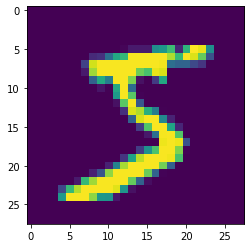

In [16]:
plt.imshow(x_train[0, :, :, ])
print(y_train[0])
pylab.show()

In [32]:
test = tf.expand_dims(x_test[0],0)
model.predict(x_test[0])
# print(test.shape)

ValueError: in user code:

    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:993 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/tengwang/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 1)
